In [ ]:
import numpy as np
import pandas as pd
import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Set the search parameters
filename = 'tense.xlsx'
search_path = '/content/drive/My Drive'

# Search for the file
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path = os.path.join(root, filename)
        break

In [ ]:
import pandas as pd

# Load the XLSX file into a DataFrame
df = pd.read_excel(file_path)

In [ ]:
df.head()

,Sentences,Tense
0,The sun rises in the east.,Simple Present
1,She plays the piano beautifully.,Simple Present
2,They go to school every day.,Simple Present
3,He likes to eat pizza.,Simple Present
4,The cat meows when it's hungry.,Simple Present


In [ ]:
df.isnull().sum()

Sentences    0
Tense        0
dtype: int64

In [ ]:
df.duplicated().sum()

1810

In [ ]:
df = df.drop_duplicates(keep='first')


In [ ]:
df.duplicated().sum()


0

In [ ]:
df.isnull().sum()

Sentences    0
Tense        0
dtype: int64

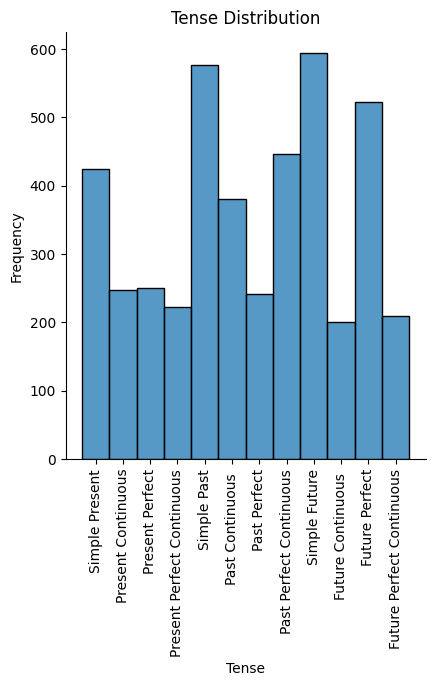

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(data=df, x='Tense', discrete=True, kde=False)

# Set labels and title
plt.xlabel('Tense')
plt.ylabel('Frequency')
plt.title('Tense Distribution')
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

In [ ]:
import re
def clean_data(sentences):
    sentences = re.sub('[^a-zA-Z]', ' ',sentences)
    sentences = sentences.lower()
    return sentences
df['Sentences'] = df['Sentences'].apply(clean_data)

In [ ]:
df

,Sentences,Tense
0,the sun rises in the east,Simple Present
1,she plays the piano beautifully,Simple Present
2,they go to school every day,Simple Present
3,he likes to eat pizza,Simple Present
4,the cat meows when it s hungry,Simple Present
...,...,...
6122,he will not have been playing football tomorro...,Future Perfect Continuous
6125,i won t have been staying in london next summer,Future Perfect Continuous
6126,she won t have been studying japanese next year,Future Perfect Continuous
6127,the president won t have been talking tomorrow,Future Perfect Continuous


In [ ]:
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
df['Tense'] = lab.fit_transform(df['Tense'])

#view updated DataFrame
print(df)

                                              Sentences  Tense
0                            the sun rises in the east      11
1                      she plays the piano beautifully      11
2                          they go to school every day      11
3                                he likes to eat pizza      11
4                       the cat meows when it s hungry      11
...                                                 ...    ...
6122  he will not have been playing football tomorro...      2
6125   i won t have been staying in london next summer       2
6126   she won t have been studying japanese next year       2
6127    the president won t have been talking tomorrow       2
6128  i won t have been searching for a new issue on...      2

[4319 rows x 2 columns]


In [ ]:
lab.inverse_transform(df['Tense'])

array(['Simple Present', 'Simple Present', 'Simple Present', ...,
       'Future Perfect Continuous', 'Future Perfect Continuous',
       'Future Perfect Continuous'], dtype=object)

In [ ]:
corpus = list(df['Sentences'])
corpus

['the sun rises in the east ',
 'she plays the piano beautifully ',
 'they go to school every day ',
 'he likes to eat pizza ',
 'the cat meows when it s hungry ',
 'we swim in the pool ',
 'my sister reads books before bed ',
 'dogs bark loudly ',
 'the train arrives at   o clock ',
 'birds fly in the sky ',
 'the teacher explains the lesson ',
 'i brush my teeth twice a day ',
 'he works in an office ',
 'she enjoys watching movies ',
 'they live in a big house ',
 'we drink coffee in the morning ',
 'the baby cries when she s tired ',
 'the bus stops at the station ',
 'it rains a lot in this city ',
 'the children play in the park ',
 'he speaks three languages fluently ',
 'she runs five miles every morning ',
 'they listen to music in their free time ',
 'we visit our grandparents on weekends ',
 'the cat sleeps on the couch ',
 'he always tells funny jokes ',
 'she dances gracefully ',
 'they study hard for exams ',
 'i eat vegetables for a healthy diet ',
 'the birds chirp in t

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1000)

X = cv.fit_transform(corpus).toarray()
y = df['Tense'].values

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer()
X = tf_transformer.fit_transform(X).toarray()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVectorizer = TfidfVectorizer(max_features =1000)
X = tfidfVectorizer.fit_transform(corpus).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train_s, X_test_s , y_train_s, y_test_s = train_test_split(X, y , test_size = 0.20, random_state=101)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression




classifiers = [GradientBoostingClassifier(),GaussianNB(),HistGradientBoostingClassifier(),
               RandomForestClassifier(),LogisticRegression()]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

for classifier in classifiers:
    classifier.fit(X_train_s,y_train_s)
    print(f'The {classifier}  Accuracy  is {accuracy_score(y_test_s,classifier.predict(X_test_s)) }' )

The GradientBoostingClassifier()  Accuracy  is 0.9305555555555556
The GaussianNB()  Accuracy  is 0.6030092592592593


In [ ]:
classifier = RandomForestClassifier()
classifier.fit(X_train_s,y_train_s)
predictions = classifier.predict(X_test_s)
confusion_matrix(y_test_s, predictions)

array([[ 38,   0,   0,   0,   0,   0,   1,   0,   0,   1,   1,   0],
       [  0, 104,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  43,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,  78,   1,   1,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,  43,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  81,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  47,   0,   0,   1,   0,   4],
       [  0,   0,   0,   0,   0,   0,   0,  41,   3,   0,   1,   3],
       [  0,   0,   0,   1,   0,   0,   0,   0,  36,   0,   0,   0],
       [  4,   7,   0,   0,   0,   0,   1,   0,   0, 117,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 111,   8],
       [  0,   0,   0,   0,   1,   0,   0,   2,   0,   0,  11,  69]])

In [ ]:
print(classification_report(y_test_s,predictions))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        41
           1       0.94      0.99      0.96       105
           2       0.98      0.98      0.98        44
           3       0.99      0.96      0.97        81
           4       0.96      1.00      0.98        43
           5       0.99      0.99      0.99        82
           6       0.96      0.90      0.93        52
           7       0.95      0.85      0.90        48
           8       0.88      0.97      0.92        37
           9       0.98      0.91      0.94       129
          10       0.90      0.93      0.91       119
          11       0.81      0.83      0.82        83

    accuracy                           0.94       864
   macro avg       0.94      0.94      0.94       864
weighted avg       0.94      0.94      0.94       864

